<a href="https://colab.research.google.com/github/ravikiraniitm17/my_git/blob/master/clustering_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))
df.head()

,CustomerID,Gender,Gender_score,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,1,19,15,39
1,2,Male,1,21,15,81
2,3,Female,0,20,16,6
3,4,Female,0,23,16,77
4,5,Female,0,31,17,40


In [0]:
X = df.iloc[:,2:6].values
print(X.shape)

(200, 4)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(x, test_size = 0.3)
print(x_train.shape)
print(x_test.shape)

(140, 4)
(60, 4)


In [0]:
print(x_train[0:2])

[[-0.88640526  1.08726535 -1.24279661 -1.4053405 ]
 [-0.88640526  0.7284319   0.16947227  0.34162973]]


In [0]:
from sklearn.cluster import KMeans
n = 3
model = KMeans(n_clusters=n, random_state=0)
model.fit(x_train)

print(model.n_clusters)

3


In [0]:
predictions = model.predict(x_test)

In [0]:
centers = model.cluster_centers_
print(centers)

[[-0.88640526 -0.63648929 -0.0271363   0.28889101]
 [ 1.12815215 -0.57847729  0.31913661 -0.06701827]
 [-0.10525035  1.17953681 -0.16314705 -0.53066697]]


In [0]:
cluster_labels = model.labels_
print(cluster_labels)

[2 2 0 2 2 2 2 0 1 2 2 2 2 0 0 0 0 0 0 1 0 1 2 1 0 2 1 1 0 0 1 0 1 0 1 0 2
 1 1 2 0 2 2 2 0 2 0 0 0 2 0 0 2 0 2 1 0 0 0 1 2 1 1 2 0 2 2 0 0 0 1 2 1 1
 1 2 2 1 2 1 1 0 1 1 0 2 1 2 2 0 2 1 2 0 2 0 2 2 2 1 1 0 2 0 2 0 2 0 0 1 2
 0 1 1 1 0 2 0 2 2 0 0 0 1 2 0 1 0 0 0 1 0 0 1 1 1 2 2 2 0]


In [0]:
inertia = model.inertia_
print(inertia)

351.0128327196244


In [0]:
print(model.n_iter_)

5


In [0]:
parameters = model.get_params
print(parameters)

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)>


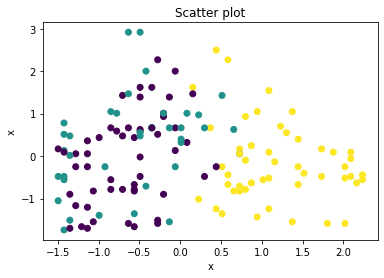

In [0]:
import matplotlib.pyplot as plt

plt.scatter(x_train[:, 1:2], x_train[:, 2:3], c = cluster_labels)
plt.title("Scatter plot")
plt.xlabel("x")
plt.ylabel("x")
plt.show()